# Benford's Law Analysis on COVID-19 Data

# Team Members:
  Mahi Sawner - mahi.sawner@adypu.edu.in

  Divyanjali Gopisetty - gopisetty.divyanjali@adypu.edu.in

  Sai Sri Spruha Perumalla - perumalla.sss@adypu.edu.in
  
  Gopi Raman Thakur - gopi.thakur@adypu.edu.in

## 📥 Step 1: Upload the COVID-19 Dataset
We begin by uploading the dataset which contains global COVID-19 statistics. This is done using the `files.upload()` method provided by Google Colab.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import files


In [2]:
uploaded = files.upload()

Saving covid_data.csv to covid_data.csv


## 📊 Step 2: Load the Dataset
We read the CSV file into a pandas DataFrame to begin data processing.


In [4]:
df=pd.read_csv('covid_data.csv')
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths
0,North America,"128,176,011",NaN,"1,645,417",NaN
1,Asia,"220,733,449",67.0,"1,549,698",NaN
2,Europe,"249,987,374",58.0,"2,071,024",1.0
3,South America,"68,987,851",NaN,"1,360,616",NaN
4,Oceania,"14,644,324",NaN,"30,358",NaN
...,...,...,...,...,...
242,Total:,"68,987,851",NaN,"1,360,616",NaN
243,Total:,"14,644,324",NaN,"30,358",NaN
244,Total:,"12,837,874",NaN,"258,830",NaN
245,Total:,721,NaN,15,NaN


## 🧹 Step 3: Clean the Data
We clean the "Total Cases" column by removing commas and converting the values to integers. This ensures we can process numeric values correctly.


In [65]:
df['Total Cases'] = df['Total Cases'].str.replace(',', '').astype(str)

In [66]:
df = df[df['Total Cases'].str.isnumeric()]

In [67]:
df['Total Cases'] = df['Total Cases'].astype(int)

## 🔍 Step 4: Extract the First Digit
We extract the leading digit from each "Total Cases" value to test its conformity to Benford’s Law.


In [78]:
df['First Digit'] = df['Total Cases'].astype(str).str[0].astype(int)


## 📈 Step 5: Calculate Frequencies
We calculate the observed frequency of each leading digit and compare it with the expected frequency according to Benford’s Law.


In [79]:
observed_count = df['First Digit'].value_counts(normalize=True).sort_index()


In [70]:
benford_frequency = {}
for i in range(1, 10):
    benford_frequency[i] = math.log10(1 + 1/i)
benford_frequency

{1: 0.3010299956639812,
 2: 0.17609125905568124,
 3: 0.12493873660829992,
 4: 0.09691001300805642,
 5: 0.07918124604762482,
 6: 0.06694678963061322,
 7: 0.05799194697768673,
 8: 0.05115252244738129,
 9: 0.04575749056067514}

In [87]:
plt.figure(figsize=(11, 7))

<Figure size 1100x700 with 0 Axes>

<Figure size 1100x700 with 0 Axes>

## 📊 Step 6: Visualize the Results
Finally, we plot a bar chart of observed frequencies and overlay it with Benford's expected distribution to analyze any patterns or anomalies.


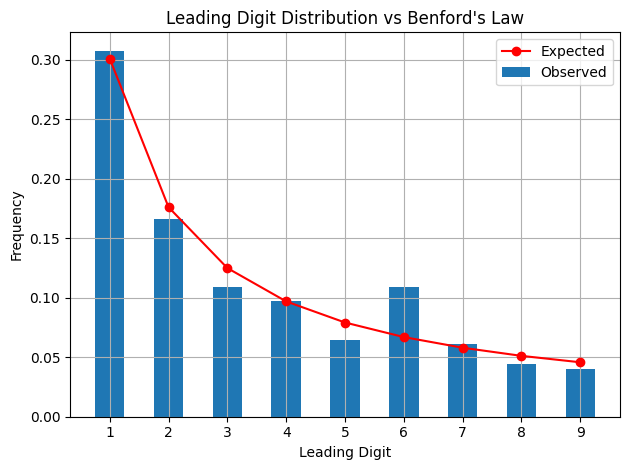

In [88]:
plt.bar(observed_count.index,observed_count.values,label='Observed',width=0.5,align='center')
plt.plot(list(benford_frequency.keys()),list(benford_frequency.values()),'ro-',label='Expected')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title("Leading Digit Distribution vs Benford's Law")
plt.xticks(range(1, 10))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
df = pd.read_csv('covid_data.csv')


# Individual Contributions
1. **Sai Sri Spruha Perumalla**  
   - Uploaded and loaded the dataset into the notebook.  
   - Cleaned the `"Total Cases"` column by removing commas, converting to numeric.  
   - Ensured data consistency and format for further processing.

2. **Gopi Raman Thakur**  
   - Extracted the first digit from `"Total Cases"` column.  
   - Added the `"First Digit"` column to the dataset for analysis.

3. **Mahi Sawner**  
   - Calculated the observed frequencies of first digits.  
   - Computed expected frequencies based on Benford’s Law using logarithmic formula.

4. **Divyanjali Gopisetty**  
   - Created comparative visualizations using Matplotlib.  
   - Designed and styled the plot (title, axis labels, legends, and layout).
